In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/sample_data/titanic.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df['Ticket_type'] = df['Ticket'].apply(lambda x: x[0:3])
df['Ticket_type'] = df['Ticket_type'].astype('category')
df['Ticket_type'] = df['Ticket_type'].cat.codes
df.drop('Ticket', axis=1, inplace=True)
print(df['Ticket_type'].unique())

[ 58  71  32  55  54  90  36  41  97  68  88  21 116 112  27  45 114 107
 100  98   3  42 102 115   9  44  63  65  13 113  30   4  78   5  11  51
  18  81  67  83  66  59 105  38  70  76  43  72  80  12  69  17  95  25
  73  39 101  82  62  57 108   8  75  84  79  20  85 103  35  15  37 110
   0  60  23  64  16  91  53  26  92  31 104  48  24   1  28  14  86  40
  93  46  77  56  34   2  10  89  99  49  94  29 111  52  61   7 106  33
  19   6 109  47  87  74  22  50  96]


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
Ticket_type      0
dtype: int64


In [ ]:
df.drop('Cabin', axis=1, inplace=True)
df.fillna({
    'Age': df['Age'].mean(),
    'Fare': df['Fare'].mean()
},inplace = True)
print(df.isnull().sum().to_string())
print(df.describe())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Ticket_type    0
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  Ticket_type  
count  418.000000  418.000000   418.000000  
mean     0.392344   35.627188    63.184211  
std      0.981429   55.840500    35.388384  
mi

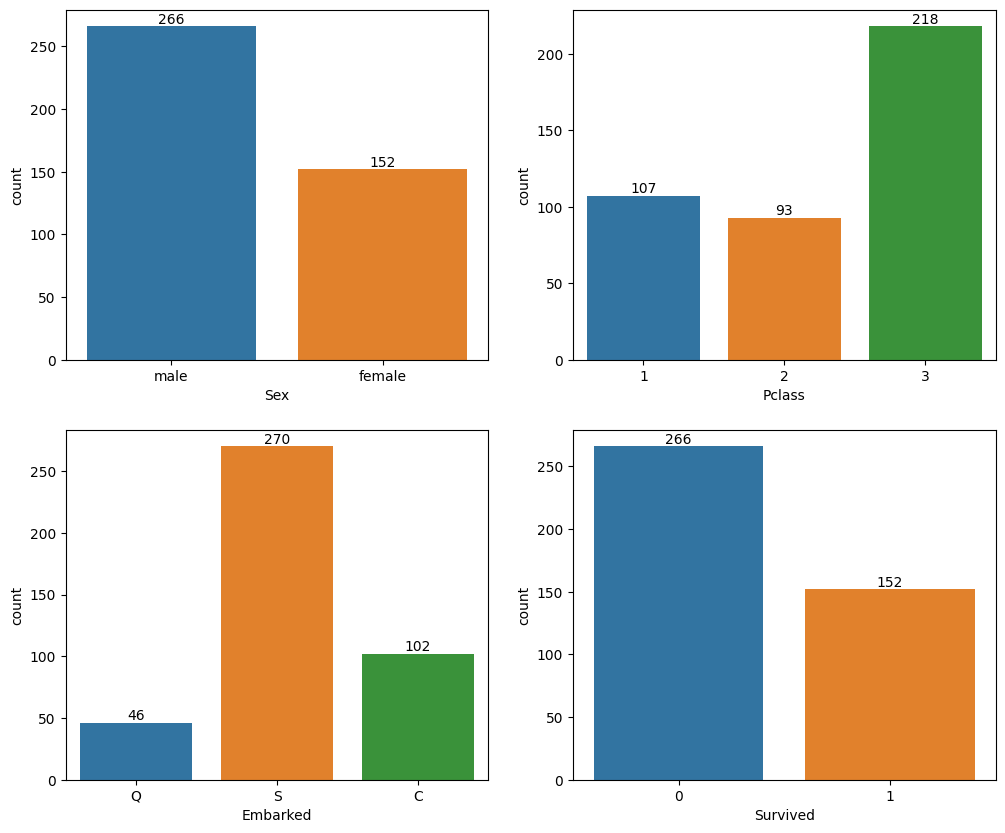

In [ ]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(ax=ax1, data=df, x='Sex')
sns.countplot(ax=ax2, data=df, x='Pclass')
sns.countplot(ax=ax3, data=df, x='Embarked')
sns.countplot(ax=ax4, data=df, x='Survived')
axes = [ax1, ax2, ax3, ax4]
for index, container in enumerate([ax1.containers, ax2.containers, ax3.containers, ax4.containers]):
  for bar in container:
    axes[index].bar_label(bar)

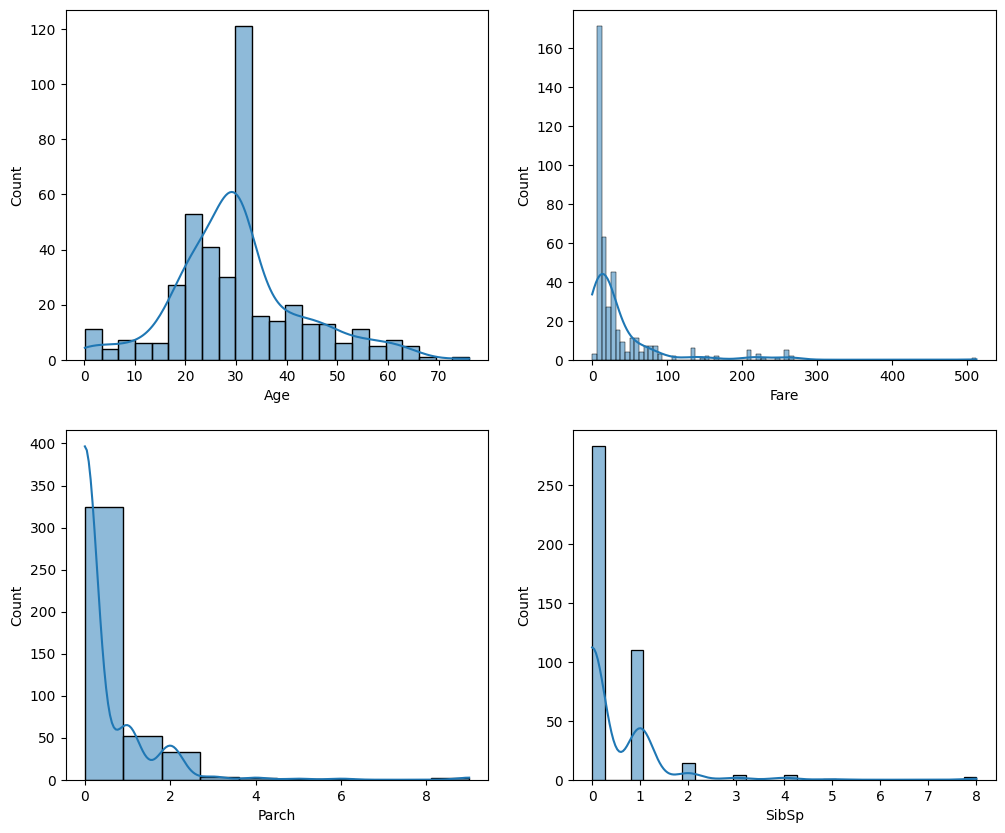

In [ ]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(12, 10))
sns.histplot(ax=ax1, data=df, x='Age', kde=True)
sns.histplot(ax=ax2, data=df, x='Fare', kde=True)
sns.histplot(ax=ax3, data=df, x='Parch', kde=True)
ax = sns.histplot(ax=ax4, data=df, x='SibSp', kde=True)

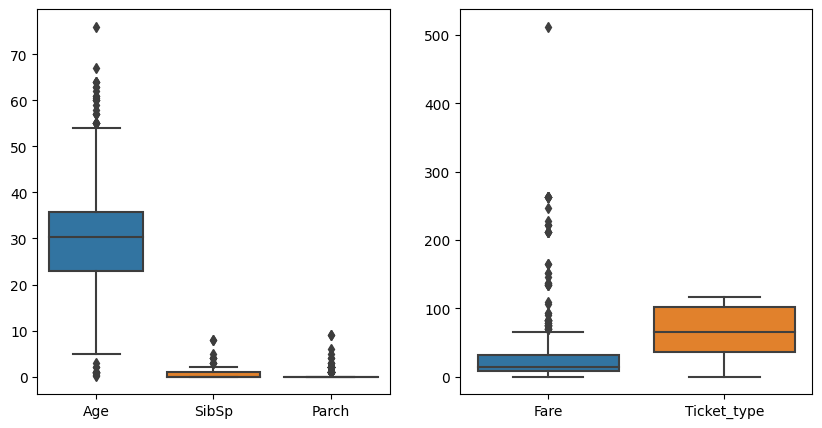

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(ax=ax1, data=df[['Age', 'SibSp', 'Parch']])
ax = sns.boxplot(ax=ax2, data=df[['Fare', 'Ticket_type']])

In [ ]:
print(df['Embarked'].unique())
print(df['Sex'].unique())
df['Sex'].replace('male', 0, inplace=True)
df['Sex'].replace('female', 1, inplace=True)
df['Embarked'].replace('Q', 0, inplace=True)
df['Embarked'].replace('S', 1, inplace=True)
df['Embarked'].replace('C', 2, inplace=True)

['Q' 'S' 'C']
['male' 'female']


In [ ]:
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type
0,892,0,3,206,0,34.5,0,0,7.8292,0,58
1,893,1,3,403,1,47.0,1,0,7.0000,1,71
2,894,0,2,269,0,62.0,0,0,9.6875,0,32
3,895,0,3,408,0,27.0,0,0,8.6625,1,55
4,896,1,3,178,1,22.0,1,1,12.2875,1,54


In [ ]:
corr_matrix = df.corr()

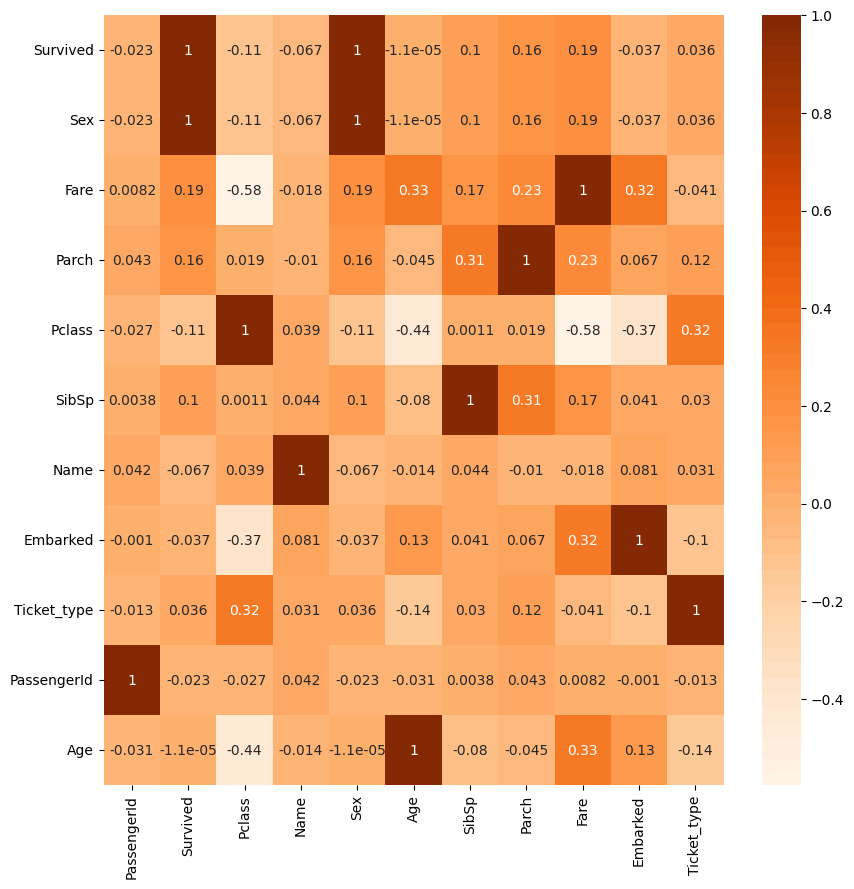

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df.corr().sort_values(by=['Survived'], ascending=False, key=abs),
                 cmap=sns.color_palette("Oranges", 50), annot=True)

In [ ]:
relevant_features = corr_matrix['Survived'].abs().sort_values(ascending=False)[:6]
print(relevant_features.to_string())
selected_features = ["Sex", "Fare", "Parch", "Pclass", "SibSp"]

Survived    1.000000
Sex         1.000000
Fare        0.191382
Parch       0.159120
Pclass      0.108615
SibSp       0.099943


In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
x = (x-x.min())/(x.max()-x.min())
print(x.head())

   PassengerId  Pclass      Name  Sex       Age  SibSp     Parch      Fare  \
0     0.000000     1.0  0.494005  0.0  0.452723  0.000  0.000000  0.015282   
1     0.002398     1.0  0.966427  1.0  0.617566  0.125  0.000000  0.013663   
2     0.004796     0.5  0.645084  0.0  0.815377  0.000  0.000000  0.018909   
3     0.007194     1.0  0.978417  0.0  0.353818  0.000  0.000000  0.016908   
4     0.009592     1.0  0.426859  1.0  0.287881  0.125  0.111111  0.023984   

   Embarked  Ticket_type  
0       0.0     0.500000  
1       0.5     0.612069  
2       0.0     0.275862  
3       0.5     0.474138  
4       0.5     0.465517  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train_no_sex = x_train.drop('Sex', axis=1)
x_test_no_sex = x_test.drop('Sex', axis=1)

In [ ]:
log_model1 = LogisticRegression()
log_model2 = LogisticRegression()
log_model1.fit(x_train, y_train)
log_model2.fit(x_train_no_sex, y_train)
print("With Sex Feature")
print(f"Accuracy in train: {log_model1.score(x_train, y_train)*100:.2f}")
print(f"Accuracy in test: {log_model1.score(x_test, y_test)*100:.2f}")
print("Without Sex Feature")
print(f"Accuracy in train: {log_model2.score(x_train_no_sex, y_train)*100:.2f}")
print(f"Accuracy in test: {log_model2.score(x_test_no_sex, y_test)*100:.2f}")

With Sex Feature
Accuracy in train: 100.00
Accuracy in test: 100.00
Without Sex Feature
Accuracy in train: 64.86
Accuracy in test: 68.57


In [ ]:
dt_model1 = DecisionTreeClassifier()
dt_model2 = DecisionTreeClassifier()
dt_model1.fit(x_train, y_train)
dt_model2.fit(x_train_no_sex, y_train)
print("With Sex Feature")
print(f"Accuracy in train: {dt_model1.score(x_train, y_train)*100:.2f}")
print(f"Accuracy in test: {dt_model1.score(x_test, y_test)*100:.2f}")
print("Without Sex Feature")
print(f"Accuracy in train: {dt_model2.score(x_train_no_sex, y_train)*100:.2f}")
print(f"Accuracy in test: {dt_model2.score(x_test_no_sex, y_test)*100:.2f}")

With Sex Feature
Accuracy in train: 100.00
Accuracy in test: 100.00
Without Sex Feature
Accuracy in train: 100.00
Accuracy in test: 55.24


In [ ]:
rf_model1 = RandomForestClassifier()
rf_model2 = RandomForestClassifier()
rf_model1.fit(x_train, y_train)
rf_model2.fit(x_train_no_sex, y_train)
print("With Sex Feature")
print(f"Accuracy in train: {rf_model1.score(x_train, y_train)*100:.2f}")
print(f"Accuracy in test: {rf_model1.score(x_test, y_test)*100:.2f}")
print("Without Sex Feature")
print(f"Accuracy in train: {rf_model2.score(x_train_no_sex, y_train)*100:.2f}")
print(f"Accuracy in test: {rf_model2.score(x_test_no_sex, y_test)*100:.2f}")

With Sex Feature
Accuracy in train: 100.00
Accuracy in test: 100.00
Without Sex Feature
Accuracy in train: 100.00
Accuracy in test: 59.05
